<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/09_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [8]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


# IMDB 리뷰 데이터셋

In [9]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500) #가장 빈도가 많은(높은) 단어로 어휘사전을 만든다
print(X_train.shape, y_train.shape)

(25000,) (25000,)


In [10]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [11]:
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
lengths = np.array([len(x) for x in X_train])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


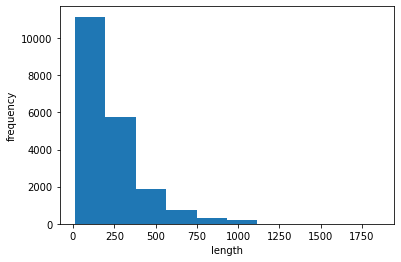

In [13]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

#대부분의 문장이 길지 않은 정도임을 유추할 수 있음

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100) #문장 최대 길이 = 단어 100개
print(train_seq.shape)

(20000, 100)


In [15]:
print(train_seq[0])  #문장은 시작이 0, 100보다 길면 짤린다

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [16]:
print(X_train[0][-10:]) # 뒤쪽에 중요한 단어가 많이 나오므로, 뒤에서 단어 10개를 골라본 것

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [17]:
print(train_seq[5]) # 100보다 작다

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [24]:
val_seq = pad_sequences(X_val, maxlen=100)
val_seq.shape

(5000, 100)

#순환 신경망 모델 만들기

In [19]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # 뉴런의 수=8
model.add(keras.layers.Dense(1, activation='sigmoid')) # 이진분류는 뉴런 1개로도 표시 가능(양성 확률, 음성 확률)

In [20]:
train_oh = keras.utils.to_categorical(train_seq) # one-hot encoding
print(train_oh.shape) 

# 20000개 , 100 - 문장의 길이(max-length), 500 단어 길이
# 각각 어떤 것을 나타내는지 잘 이해하기!

(20000, 100, 500)


In [26]:
train_oh[0,1,:12]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
train_oh[0,99,:12] #하나의 샘플에 99개의 정보가 존재한다

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [22]:
model.summary() # 마지막 timestep의 은닉 상태 = 뉴럭의 개수

# 숙제 : 왜 Trainable params가 4081개인가?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


#순환 신경망 훈련하기

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, y_train, epochs=100, batch_size=64, validation_data=(val_oh, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.6930 - accuracy: 0.5210 - val_loss: 0.6896 - val_accuracy: 0.5390
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6811 - accuracy: 0.5750 - val_loss: 0.6753 - val_accuracy: 0.6014
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6667 - accuracy: 0.6200 - val_loss: 0.6595 - val_accuracy: 0.6366
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6505 - accuracy: 0.6546 - val_loss: 0.6456 - val_accuracy: 0.6632
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6360 - accuracy: 0.6783 - val_loss: 0.6316 - val_accuracy: 0.6806
Epoch 6/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6206 - accuracy: 0.6970 - val_loss: 0.6162 - val_accuracy: 0.7058
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6043 - accuracy: 0.7166 - val_loss: 0.6010 - val_ac

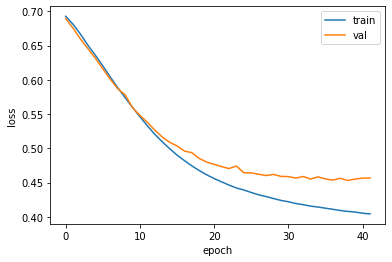

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#단어 임베딩을 사용하기